# Exploratory Data Analysis — Daily Minimum Temperatures
Goal: understand data quality, distribution, temporal patterns (trend/seasonality), autocorrelation & stationarity, anomalies, and implications for modeling.


In [7]:

# 0. Imports & utils

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

# Statsmodels for time series tools
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

plt.rcParams["figure.figsize"] = (12,5)


In [8]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import os

# Load data
df = pd.read_csv('../data/raw/temperatures.csv', parse_dates=['Date'], index_col='Date')

df.head()

,"Daily minimum temperatures in Melbourne, Australia, 1981-1990"
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


our dataFrame consist of 2 columns :the date in the format year-months-day and the corresponding temmperature . 

In [10]:
# we rename the temperature columns
df.rename(columns={'Daily minimum temperatures in Melbourne, Australia, 1981-1990':'temp'}, inplace =True)

df.head(1)

,temp
Date,
1981-01-01,20.7


### Lets reviews the quality of the data

In [11]:
# Shape, head, tail
print("Shape:", df.shape)
display(df.head())
display(df.tail())

# Dtypes & missing values
print(df.dtypes)
print("Missing values per column:\n", df.isnull().sum())

# Duplicates
print("Duplicate rows:", df.reset_index().duplicated(subset=['Date']).sum())


Shape: (3650, 1)


,temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


,temp
Date,
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5
1990-12-30,15.7
1990-12-31,13.0


temp    object
dtype: object
Missing values per column:
 temp    0
dtype: int64
Duplicate rows: 0


Index freq before reindex: D
Missing dates after reindex: 2


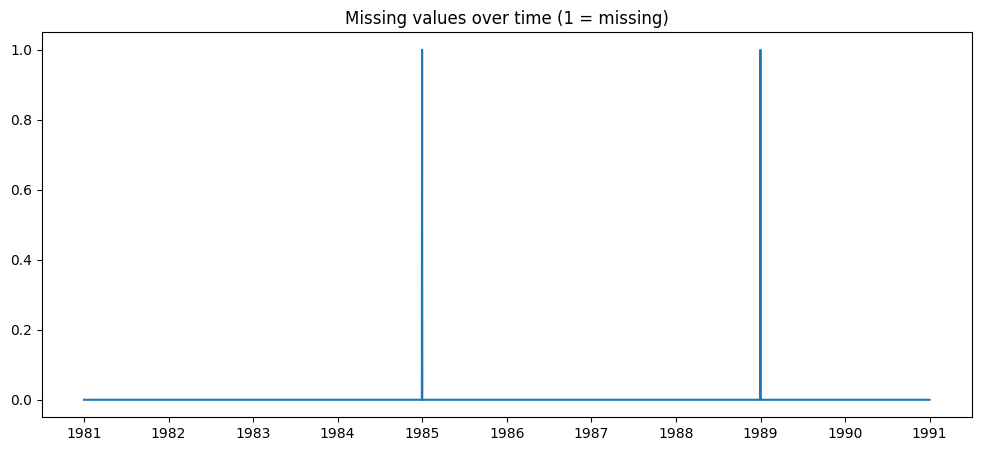

In [15]:
# Ensure index is datetime and sorted
df.index = pd.to_datetime(df.index)
df.sort_index(inplace=True)

# Check frequency
print("Index freq before reindex:", df.index.inferred_freq)

# Reindex to daily frequency and mark missing dates
full_idx = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')
df = df.reindex(full_idx)
print("Missing dates after reindex:", df['temp'].isnull().sum())

# Visualize missing pattern (simple)
plt.plot(df['temp'].isnull().astype(int))
plt.title("Missing values over time (1 = missing)")
plt.show()


In [ ]:
# Simple safe imputation (documenter ce choix)
df['Temp_interpolated'] = df['temp'].interpolate(method='time')  # time-interpolation

df['Temp_interpolated'] = df['temp'].interpolate(method='time')
# Check
print("Missing after interpolation:", df['Temp_interpolated'].isnull().sum())



Missing after interpolation: 2


/tmp/ipykernel_55381/1116337678.py:2: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df['Temp_interpolated'] = df['temp'].interpolate(method='time')  # time-interpolation
